In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import seaborn as sns #visualisation
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [2]:
df_ire = pd.read_excel('/Users/Noel/Documents/MSc_CA2/ireland-cattle-prices.xlsx')

In [3]:
df_GB = pd.read_excel('/Users/Noel/Documents/MSc_CA2/gt.-britain-cattle-prices.xlsx')

In [4]:
df_NI = pd.read_excel('/Users/Noel/Documents/MSc_CA2/n.ireland-cattle-prices.xlsx')

In [5]:
print(df_ire.isnull().sum())
print(df_GB.isnull().sum())
print(df_NI.isnull().sum())

Date                      0
Bulls R3 (Ire)            0
Cows O2 (Ire)             0
Cows O3 (Ire)             0
Cows O4 (Ire)             0
Cows P2 (Ire)             0
Cows P3 (Ire)             0
Cows R2 (lre)           248
Cows R3 (Ire)             0
Cows R4 (Ire)             0
Heifers O2 (Ire)          1
Heifers O3 (Ire)          1
Heifers O4 (Ire)          0
Heifers R2 (Ire)          1
Heifers R3 (Ire)          1
Heifers R4 (Ire)          1
Heifers U2 (Ire)          1
Heifers U3 (Ire)          1
Steers O3 (Ire)           2
Steers O4 (Ire)           0
Steers R3 (Ire)           0
Steers R4 (Ire)           0
Steers U2 (Ire)           0
Steers U3 (Ire)           0
Steers U4 (Ire)           0
Young Bulls O2 (Ire)      0
Young Bulls O3 (Ire)      0
Young Bulls R2 (Ire)      0
Young Bulls R3 (Ire)      0
Young Bulls U2 (Ire)      1
Young Bulls U3 (Ire)      0
dtype: int64
Date                     0
Bulls R3 (GB)          250
Cows O2 (GB)             0
Cows O3 (GB)             0
Cows O4 (GB

In [7]:
concatenated = pd.concat([df_ire, df_GB], axis=1)
df = pd.concat([concatenated, df_NI], axis=1)

In [8]:
#dropping columns that are mostly empty
to_drop = ['Cows R2 (lre)','Bulls R3 (GB)','Cows R2 (GB)','Bulls R3 (NI)', 'Cows R2 (NI)' ]
df.drop(to_drop, inplace=True, axis=1)

In [9]:
#dropping null value rows
df.dropna(how='any',axis=0) 

Date  Bulls R3 (Ire)  Cows O2 (Ire)  Cows O3 (Ire)  Cows O4 (Ire)  \
0   2019-10-28           241.6          255.0          259.2          259.7   
1   2019-10-14           239.9          264.6          268.3          268.5   
2   2019-10-07           248.3          270.1          274.2          274.6   
3   2019-09-30           253.0          277.9          279.9          278.4   
4   2019-09-16           264.2          283.3          283.9          282.5   
..         ...             ...            ...            ...            ...   
245 2015-01-05           320.4          312.7          316.3          317.7   
246 2014-12-29           346.5          306.8          315.6          316.8   
247 2014-12-22           309.9          304.9          313.9          313.8   
248 2014-12-15           299.3          303.3          310.4          311.7   
249 2014-12-08           280.2          303.4          310.6          311.6   

     Cows P2 (Ire)  Cows P3 (Ire)  Cows R3 (Ire)  Cows R4 (Ire)  \
0            228.6          247.7          279.6          279.3   
1            235.1          256.0          288.9          288.0   
2            242.9          262.0          296.1          293.7   
3            252.7          267.1          298.4          297.1   
4            257.2          272.6          302.0          300.1   
..             ...            ...            ...            ...   
245          282.5          306.8          342.7          341.6   
246          291.0          308.4          337.5          338.1   
247          276.8          304.6          337.4          336.6   
248          275.1          299.2          334.7          334.4   
249          275.8          299.3          333.7          333.1   

     Heifers O2 (Ire)  ...  Steers R4 (NI)  Steers U2 (NI)  Steers U3 (NI)  \
0               322.9  ...          376.43          370.43          371.74   
1               326.6  ...          365.48          367.34          367.62   
2               326.5  ...          359.08          356.23          359.15   
3               331.7  ...          361.77          359.17          360.16   
4               329.7  ...          357.45          358.83          361.05   
..                ...  ...             ...             ...             ...   
245             368.0  ...          463.53          467.37          471.73   
246             364.9  ...          458.84          464.27          466.83   
247             358.8  ...          455.46          459.22          462.19   
248             360.4  ...          453.04          456.78          459.73   
249             357.1  ...          438.01          438.19          443.50   

     Steers U4 (NI)  Young Bulls O2 (NI)  Young Bulls O3 (NI)  \
0            370.12               337.37               345.89   
1            358.68               329.29               333.71   
2            354.70               321.27               329.39   
3            353.60               324.38               332.57   
4            357.50               325.69               331.77   
..              ...                  ...                  ...   
245          469.06               422.81               418.00   
246          463.01               402.24               402.77   
247          449.42               403.04               407.06   
248          447.03               400.90               404.90   
249          437.60               391.07               401.83   

     Young Bulls R2 (NI)  Young Bulls R3 (NI)  Young Bulls U2 (NI)  \
0                 354.79               360.64               359.13   
1                 353.09               356.86               353.88   
2                 347.95               352.07               348.90   
3                 344.37               345.92               349.15   
4                 347.26               359.39               352.49   
..                   ...                  ...                  ...   
245               446.34               452.93   

In [10]:
df = df.dropna(how='any',axis=0)

In [11]:
#drop duplicate date columns
df = df.T.drop_duplicates().T

<Figure size 1440x720 with 0 Axes>

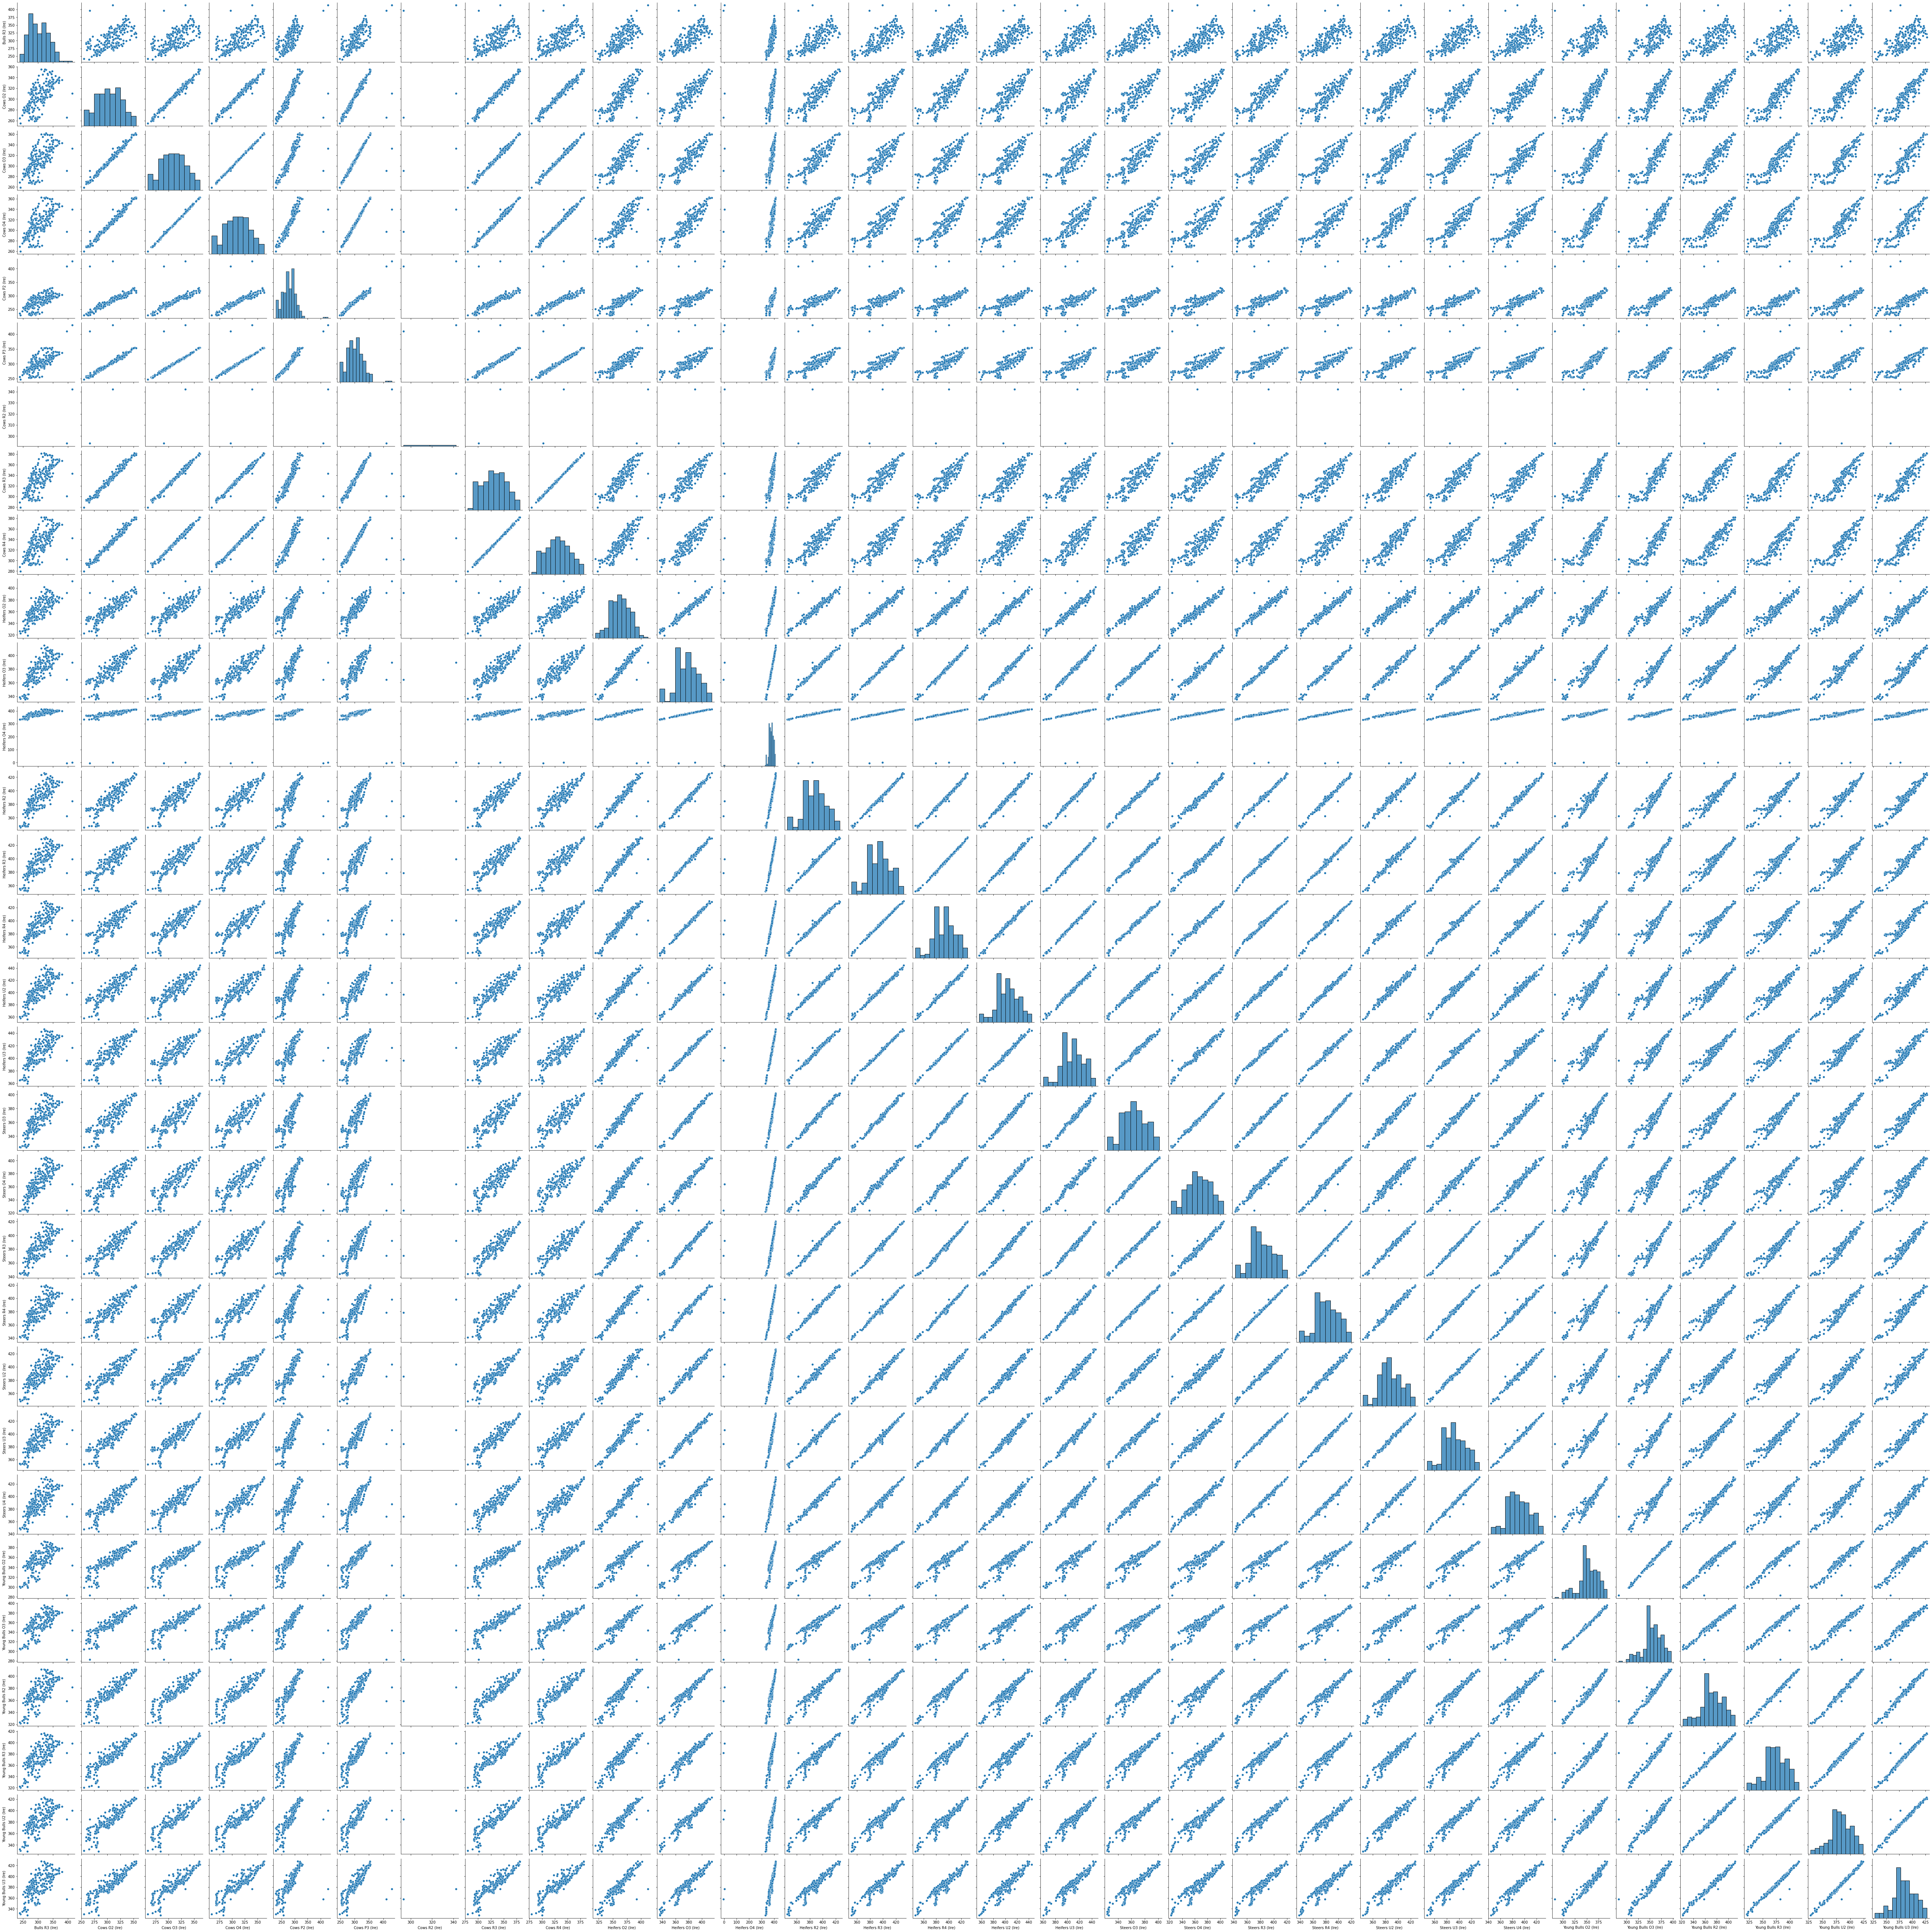

In [12]:
# paiwise scatter plot for Ireland cattle prices

plt.figure(figsize=(20, 10))
sns.pairplot(df_ire)
plt.show()

In [13]:
# correlation matrix
cor = df.corr()
cor

Empty DataFrame
Columns: []
Index: []

In [14]:
df.iloc[:,3]

0      259.2
1      268.3
2      274.2
3      279.9
4      283.9
       ...  
245    316.3
246    315.6
247    313.9
248    310.4
249    310.6
Name: Cows O3 (Ire), Length: 242, dtype: object

In [20]:
# testing the realtionship between the price of R3 cows in ireland vs cows in GB
X = df.iloc[:, 30:37].values
y = df.iloc[:,3].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [22]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting the Test set results
#Remember that we need to check our training results on the Test set but we can't plot a graph
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) #we display values with only 2 decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[322.91285508320186 322.8]
 [306.7515298045794 286.0]
 [281.620594886974 269.0]
 [325.9939183000154 333.9]
 [320.46808991747673 322.1]
 [326.9452414676534 347.5]
 [313.4481795993534 320.2]
 [323.964365635756 341.3]
 [301.0289895818466 294.9]
 [331.1841173645758 328.9]
 [356.5936992431595 348.6]
 [290.93528799905175 307.7]
 [296.00357049876544 290.9]
 [296.1242287035542 292.5]
 [312.02481542790144 300.2]
 [289.81625496256123 298.6]
 [302.65618683052895 301.1]
 [301.33387581442867 302.1]
 [347.19716555070426 346.6]
 [280.63247239059496 284.5]
 [310.3845772051009 321.5]
 [276.7798828717577 281.7]
 [311.94704594356045 327.1]
 [306.00652729315726 318.1]
 [289.676785396598 283.0]
 [315.1630789289701 296.9]
 [331.2955354958187 330.4]
 [291.2135803995791 312.7]
 [291.1900488298947 281.3]
 [327.65255645982785 324.9]
 [307.2446818146215 294.3]
 [270.7586624190569 269.5]
 [315.91387658366136 314.8]
 [313.09495940622594 322.1]
 [329.1960297313037 333.0]
 [319.01442938260385 298.6]
 [297.464348745

In [24]:

#We calculate the precision of the model or r^2
print('The precision of the model is ')
print(regressor.score(X_train, y_train))



The precision of the model is 
0.7796553415794188


In [25]:
# Splitting the dataset into the Training set and Test set for Decision Tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [27]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[319.8 322.8]
 [302.25 286.0]
 [269.0 269.0]
 [345.2 333.9]
 [322.1 322.1]
 [338.0 347.5]
 [313.9 320.2]
 [318.6 341.3]
 [289.0 294.9]
 [326.3 328.9]
 [345.7 348.6]
 [306.6 307.7]
 [267.9 290.9]
 [290.7 292.5]
 [315.6 300.2]
 [297.3 298.6]
 [310.4 301.1]
 [307.2 302.1]
 [339.5 346.6]
 [282.7 284.5]
 [313.9 321.5]
 [268.0 281.7]
 [325.65 327.1]
 [312.9 318.1]
 [297.2 283.0]
 [286.5 296.9]
 [329.6 330.4]
 [297.4 312.7]
 [281.75 281.3]
 [303.2 324.9]
 [308.2 294.3]
 [285.6 269.5]
 [322.9 314.8]
 [322.1 322.1]
 [328.7 333.0]
 [303.46666666666664 298.6]
 [290.7 294.6]
 [310.4 310.6]
 [300.6 307.8]
 [293.3 299.7]
 [268.0 284.0]
 [269.0 272.5]
 [322.9 316.0]
 [269.7 301.5]
 [322.7 318.9]
 [281.75 289.6]
 [330.2 333.3]
 [297.4 283.5]
 [359.1 359.6]]


In [28]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7643038331101903

In [29]:
# Splitting the dataset into the Training set and Test set for Random Forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [31]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[322.61 322.8]
 [303.09000000000003 286.0]
 [273.291 269.0]
 [339.64 333.9]
 [325.53999999999996 322.1]
 [342.01 347.5]
 [312.87000000000006 320.2]
 [324.14 341.3]
 [297.812 294.9]
 [315.95 328.9]
 [345.12 348.6]
 [305.59999999999997 307.7]
 [296.47 290.9]
 [297.36 292.5]
 [316.39416666666665 300.2]
 [298.43 298.6]
 [295.6675 301.1]
 [298.3154761904762 302.1]
 [341.68999999999994 346.6]
 [283.85 284.5]
 [314.67999999999995 321.5]
 [272.54999999999995 281.7]
 [318.39666666666665 327.1]
 [297.71 318.1]
 [285.21999999999997 283.0]
 [298.22999999999996 296.9]
 [323.09000000000003 330.4]
 [291.74 312.7]
 [287.5733333333334 281.3]
 [313.78999999999996 324.9]
 [302.15 294.3]
 [279.53 269.5]
 [306.02 314.8]
 [320.4 322.1]
 [326.63 333.0]
 [306.5433333333334 298.6]
 [296.58000000000004 294.6]
 [301.23 310.6]
 [292.26000000000005 307.8]
 [291.23 299.7]
 [272.11 284.0]
 [277.76 272.5]
 [315.61 316.0]
 [281.28 301.5]
 [316.47 318.9]
 [288.50333333333333 289.6]
 [337.62 333.3]
 [294.05 283.5]
 [36

In [32]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8290202940128972